# House Value Prediction Project By Ax Hoang

## Project Overview

In this project, we explore the potential of machine learning to predict house values. Utilizing a rich dataset and implementing two different modeling approaches, Linear Regression and RandomForestRegressor, we aim to uncover insights into the factors influencing house prices and predict their values accurately.

## Dataset Description

Our dataset, `housing.csv`, comprises various features related to housing characteristics and demographics. Features include the number of rooms, location, age of the house, and more. These elements are crucial in understanding and predicting the `median_house_value` for homes across different regions.

## Objectives

1. **Model Development**: Develop models to predict the median house values using Linear Regression and RandomForestRegressor.
2. **Performance Evaluation**: Evaluate the models based on their prediction accuracy and ability to generalize across different datasets.
3. **Feature Importance**: Identify which features most significantly influence house values according to our models.
4. **Model Comparison**: Compare the effectiveness of linear versus non-linear modeling techniques in real estate price prediction.

## Challenges

- How accurately can we predict house values based on the available features?
- What are the key factors that significantly impact house prices?
- Which model better captures the complexities of real estate market data?
- How can the models be improved for better accuracy and reliability?

## Expected Outcomes

By the end of this analysis, we aim to have a clearer understanding of the capabilities and limitations of each modeling approach in the context of real estate pricing. We anticipate generating actionable insights that can be used for more informed decision-making in real estate investments and policy-making.

This project is not just about forecasting; it's about uncovering the nuances that drive the real estate market, using the power of machine learning.




In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv('housing.csv')

In [47]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [49]:
data.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [124]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2)

In [154]:
train_data =X_train.join(y_train).dropna()

In [155]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4153,-118.20,34.11,52.0,678.0,173.0,791.0,186.0,4.0625,<1H OCEAN,171300.0
17177,-122.48,37.51,22.0,1564.0,278.0,761.0,270.0,4.7578,NEAR OCEAN,318500.0
16380,-121.30,38.03,11.0,2866.0,654.0,1404.0,525.0,2.5050,INLAND,95000.0
11907,-117.40,33.97,38.0,1383.0,238.0,649.0,232.0,5.0194,INLAND,148900.0
2896,-118.97,35.37,52.0,425.0,119.0,380.0,97.0,1.4125,INLAND,42500.0
...,...,...,...,...,...,...,...,...,...,...
19964,-119.12,36.19,21.0,2645.0,464.0,1245.0,407.0,2.9145,INLAND,114200.0
15548,-117.09,33.12,11.0,567.0,184.0,620.0,163.0,2.5284,<1H OCEAN,122500.0
4933,-118.26,34.00,37.0,2615.0,697.0,2484.0,630.0,1.9208,<1H OCEAN,103400.0
11299,-117.93,33.78,28.0,4380.0,820.0,2187.0,835.0,3.9018,<1H OCEAN,182300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

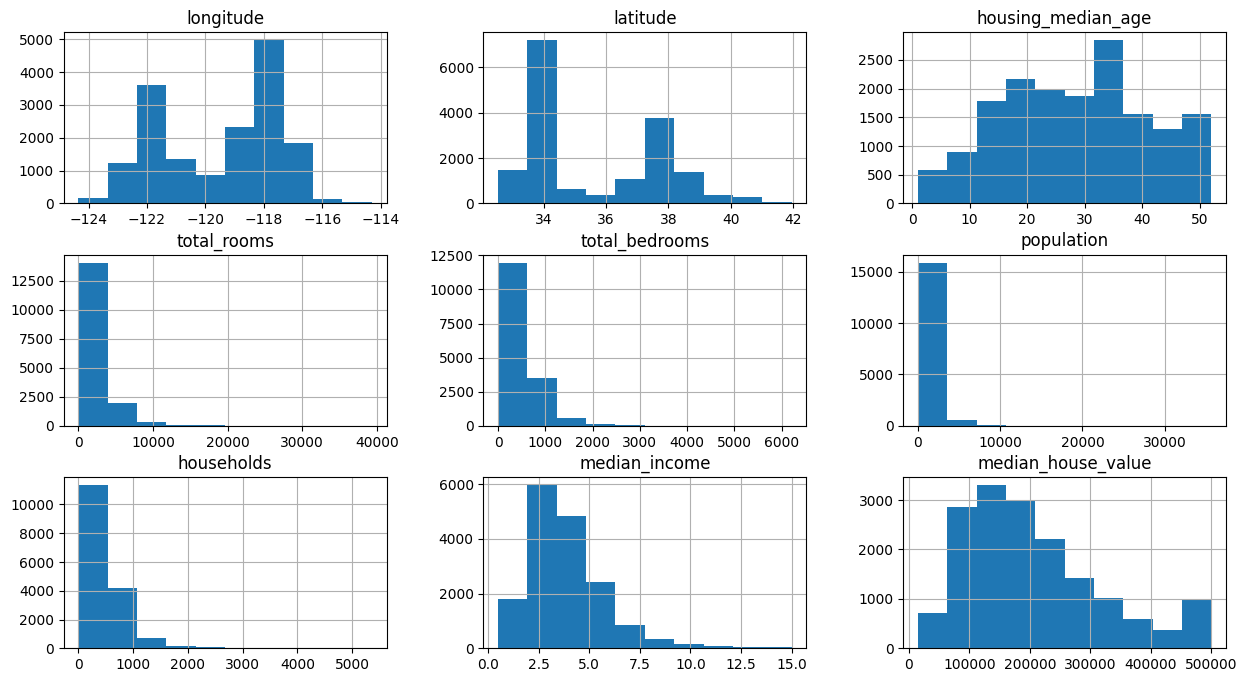

In [55]:
train_data.hist(figsize =(15,8))

In [56]:
numeric_train_data = train_data.select_dtypes(include=['float64', 'int64'])

In [57]:
corr_matrix = numeric_train_data.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924335,-0.114614,0.051041,0.078425,0.106976,0.064393,-0.020033,-0.048551
latitude,-0.924335,1.000000,0.017136,-0.043080,-0.076506,-0.115676,-0.079828,-0.075443,-0.141774
housing_median_age,-0.114614,0.017136,1.000000,-0.363655,-0.322483,-0.297671,-0.304684,-0.122393,0.102526
total_rooms,0.051041,-0.043080,-0.363655,1.000000,0.930340,0.857421,0.920208,0.199420,0.136067
total_bedrooms,0.078425,-0.076506,-0.322483,0.930340,1.000000,0.876452,0.980968,-0.005258,0.052432
population,0.106976,-0.115676,-0.297671,0.857421,0.876452,1.000000,0.904645,0.006644,-0.023412
households,0.064393,-0.079828,-0.304684,0.920208,0.980968,0.904645,1.000000,0.014791,0.068303
median_income,-0.020033,-0.075443,-0.122393,0.199420,-0.005258,0.006644,0.014791,1.000000,0.689250
median_house_value,-0.048551,-0.141774,0.102526,0.136067,0.052432,-0.023412,0.068303,0.689250,1.000000


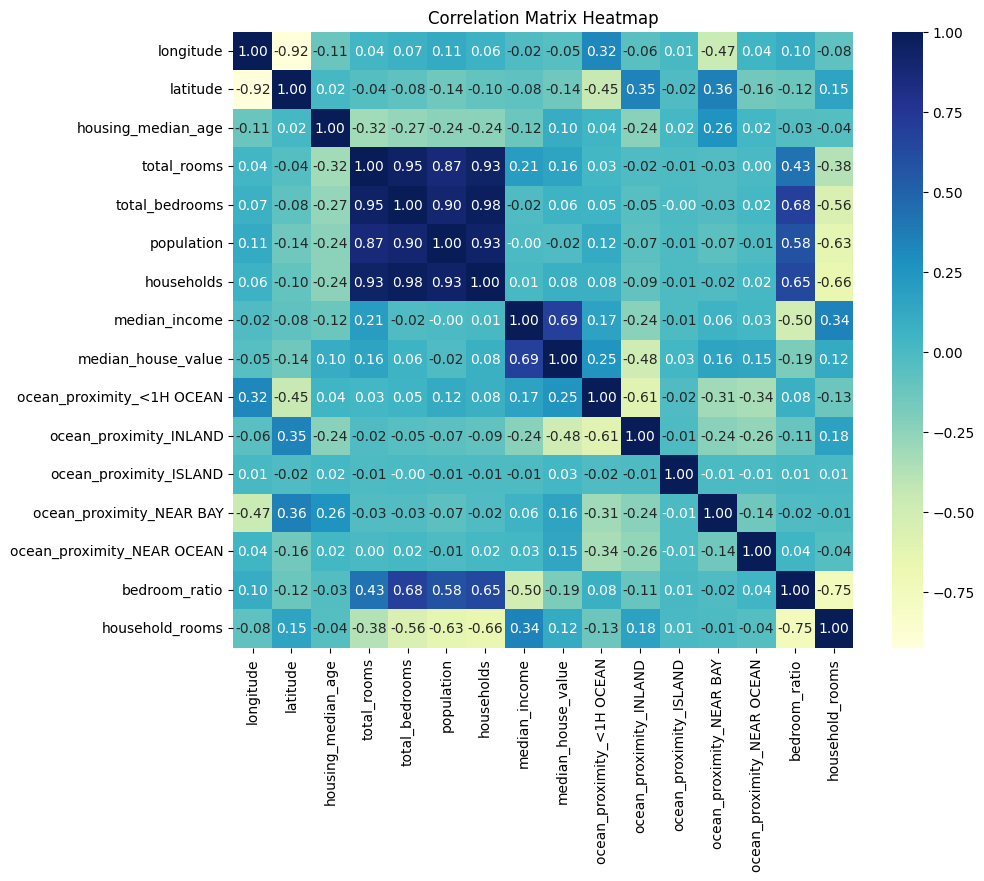

In [169]:
plt.figure(figsize=(10, 8))  # Optional: Adjusts the figure size
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [60]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

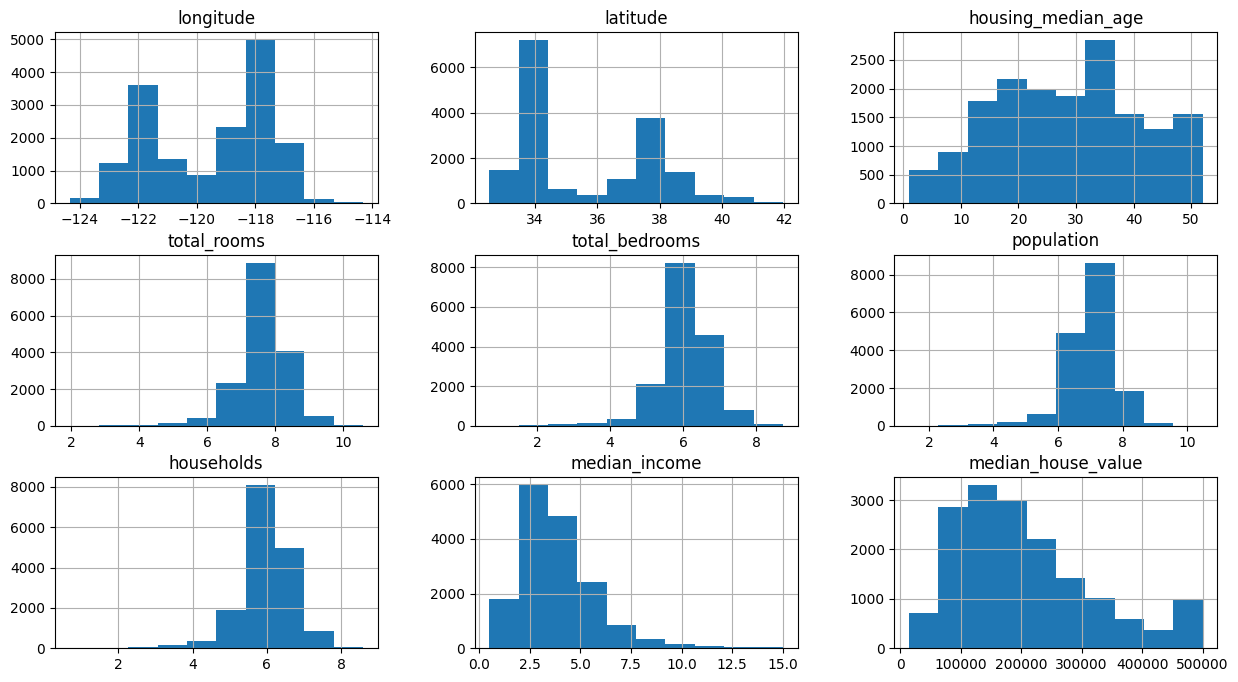

In [61]:
train_data.hist(figsize =(15,8))

In [62]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7293
INLAND        5249
NEAR OCEAN    2155
NEAR BAY      1810
ISLAND           5
Name: count, dtype: int64

In [156]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4153,-118.20,34.11,52.0,678.0,173.0,791.0,186.0,4.0625,<1H OCEAN,171300.0
17177,-122.48,37.51,22.0,1564.0,278.0,761.0,270.0,4.7578,NEAR OCEAN,318500.0
16380,-121.30,38.03,11.0,2866.0,654.0,1404.0,525.0,2.5050,INLAND,95000.0
11907,-117.40,33.97,38.0,1383.0,238.0,649.0,232.0,5.0194,INLAND,148900.0
2896,-118.97,35.37,52.0,425.0,119.0,380.0,97.0,1.4125,INLAND,42500.0
...,...,...,...,...,...,...,...,...,...,...
19964,-119.12,36.19,21.0,2645.0,464.0,1245.0,407.0,2.9145,INLAND,114200.0
15548,-117.09,33.12,11.0,567.0,184.0,620.0,163.0,2.5284,<1H OCEAN,122500.0
4933,-118.26,34.00,37.0,2615.0,697.0,2484.0,630.0,1.9208,<1H OCEAN,103400.0
11299,-117.93,33.78,28.0,4380.0,820.0,2187.0,835.0,3.9018,<1H OCEAN,182300.0


In [157]:
train_data = train_data.join(dummies).drop('ocean_proximity', axis=1)

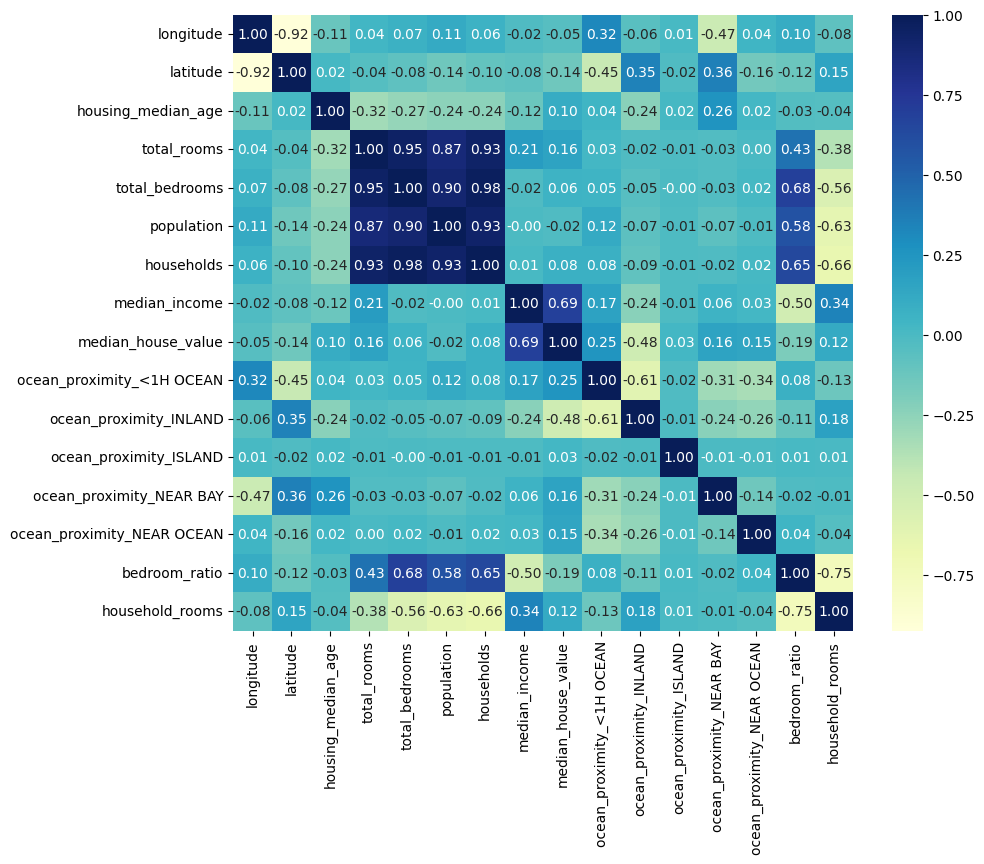

In [71]:

# Ensure matplotlib plots are displayed inline in Jupyter Notebooks
%matplotlib inline

# Calculate the correlation matrix
corr_matrix = train_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # You can adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.show()  


<Axes: xlabel='latitude', ylabel='longitude'>

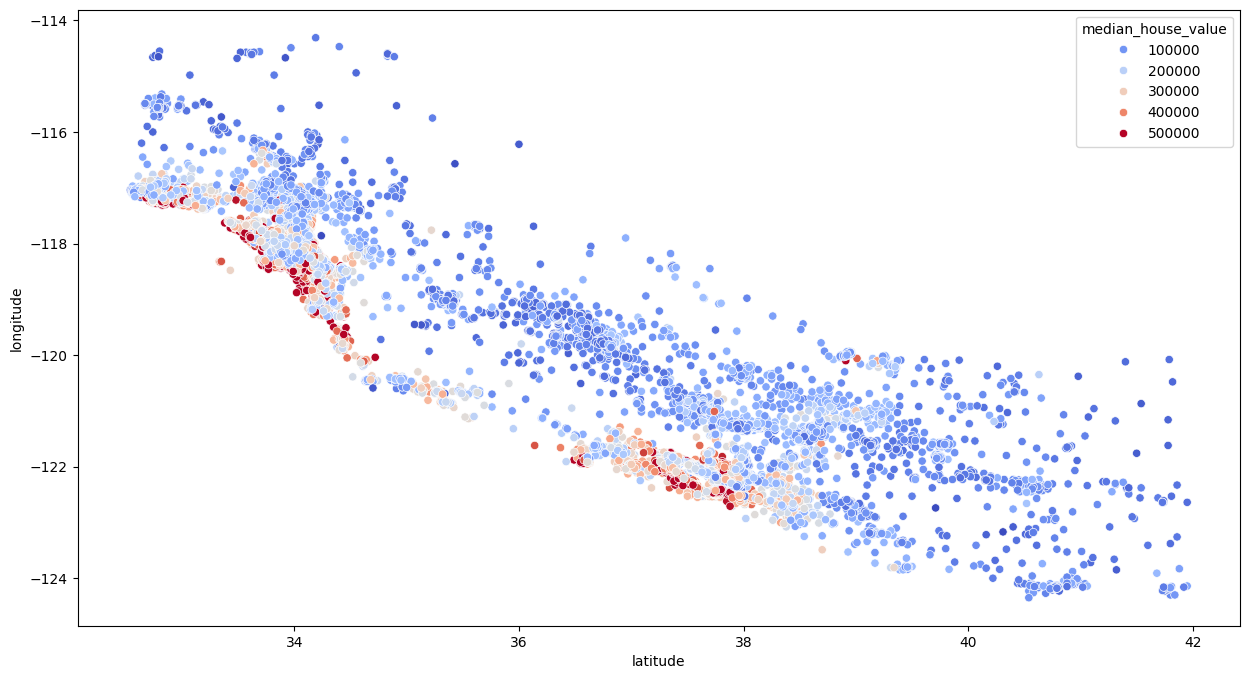

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,8)) 


sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')


In [74]:
# feature engineering 
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [75]:
train_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
       'bedroom_ratio', 'household_rooms'],
      dtype='object')

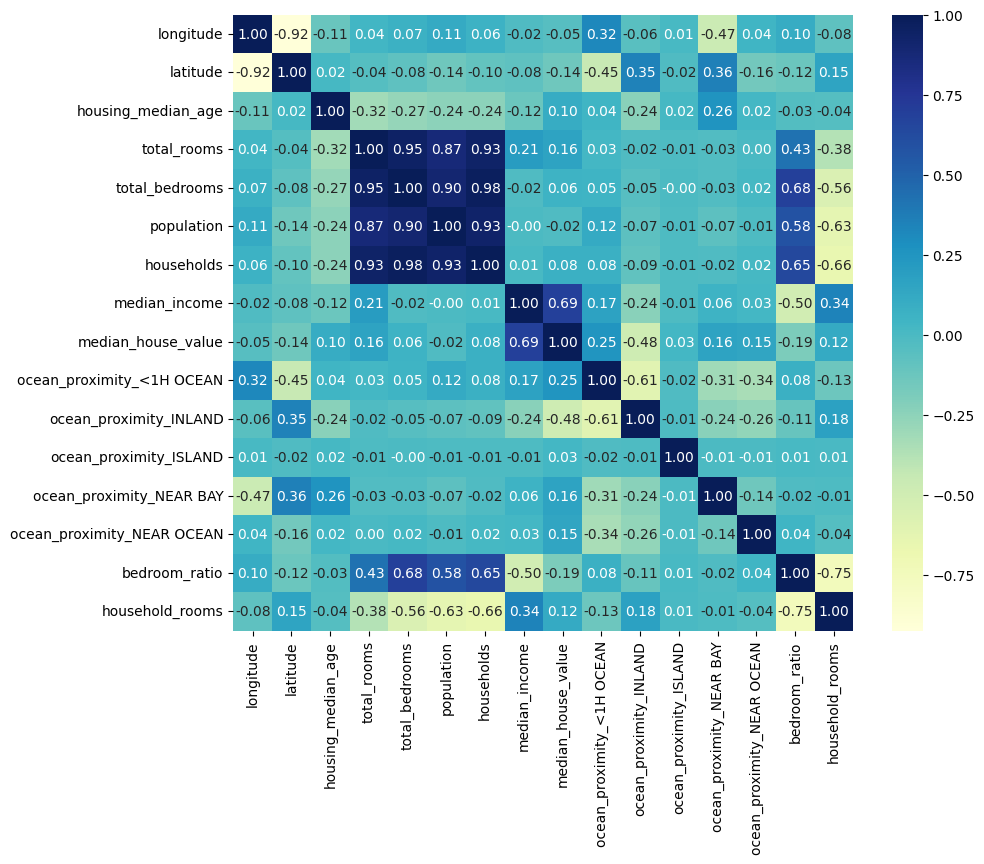

In [76]:

%matplotlib inline


corr_matrix = train_data.corr()


plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.show()  

In [113]:
from sklearn.linear_model  import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

In [129]:
# Ensure the 'dummies' DataFrame is aligned properly
print("Columns in X_test:", X_test.columns)
print("Columns in dummies:", dummies.columns)

# Joining X_test and y_test
test_data = X_test.join(y_test)

# Check for NaN values in key columns before applying transformations
print("NaN counts before transformation:", test_data[['total_rooms', 'total_bedrooms', 'population', 'households']].isna().sum())

# Applying logarithmic transformations
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

# Join with 'dummies' and check if 'ocean_proximity' needs dropping
if 'ocean_proximity' in test_data.columns:
    test_data = test_data.join(dummies).drop('ocean_proximity', axis=1)
else:
    test_data = test_data.join(dummies)

# Additional feature engineering
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

# Final check
print("Final structure of test_data:", test_data.head())


Columns in X_test: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')
Columns in dummies: Index(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')
NaN counts before transformation: total_rooms        0
total_bedrooms    39
population         0
households         0
dtype: int64
Final structure of test_data:        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4290     -118.30     34.10                38.0     7.634337        6.818924   
9961     -122.26     38.33                34.0     7.625107        5.758902   
4065     -118.47     34.15                 7.0     8.749415        7.295735   
8278     -118.16     33.78                29.0     8.212026        7.171657   
16936    -122.32     37.56        

In [137]:
from sklearn.impute import SimpleImputer

# Create an imputer object that will replace each NaN with the mean of that column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to X_test dataset
X_test_imputed = imputer.fit_transform(X_test)

# Convert the imputed numpy array back to a DataFrame to maintain column names
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)


In [138]:
# Check again for NaN values
nan_counts = pd.DataFrame(X_test_imputed).isna().sum()
print("NaN counts after imputation in X_test:", nan_counts)


NaN counts after imputation in X_test: longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
bedroom_ratio                 0
household_rooms               0
dtype: int64


In [134]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [139]:
# Score the model using the imputed dataset
score = reg.score(X_test_imputed, y_test)
print("Model Score after handling NaNs:", score)


Model Score after handling NaNs: 0.6562541857180837


In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Example data loading (assuming 'train_data' is your DataFrame)
# Ensure your DataFrame 'train_data' includes both features and the target variable

# Step 1: Identify the target variable and separate it
X = train_data.drop('median_house_value', axis=1)  # Drop the target to isolate features
y = train_data['median_house_value']               # This is the target variable

# Step 2: Encode categorical data (if not already done)
X_encoded = pd.get_dummies(X)

# Step 3: Assuming you already have your data split or you are re-splitting (demonstration purposes)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the RandomForestRegressor
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)

# Optional: Predict and evaluate
y_pred = forest.predict(X_test)

# Example evaluation
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)



Root Mean Squared Error: 49597.38348256059


In [167]:
forest.score(X_test,y_test)

0.8076427159696805

# Model Evaluation and Comparison

## Root Mean Squared Error (RMSE)

- **Value**: 49,597.38
- **Interpretation**: This indicates that, on average, the predictions of the RandomForestRegressor model deviate from the actual house values by approximately $49,597.38. The interpretation of whether this RMSE is high or low depends largely on the context of your target values. For example, if typical house values range significantly, this RMSE might indicate a need for model improvement.

## Model Scores: R^2 Score

- **RandomForestRegressor**: 80%
  - This score suggests that the model can predict 80% of the variance in the target variable from the features, indicating a good fit to the data.
- **Linear Regression**: 65%
  - A lower score compared to the RandomForestRegressor, suggesting less effectiveness in capturing the variance of the target variable. This might be due to the inability of a linear model to capture more complex, non-linear relationships.

## Key Takeaways

1. **Model Comparison**:
   - The RandomForestRegressor outperforms the Linear Regression model, likely due to its ability to handle non-linearities and complex patterns in the data.

2. **Considerations for RMSE**:
   - If RMSE is high relative to the range and average of the target variable (`median_house_value`), consider examining the data for outliers, leverage points, or segments where the model underperforms.

3. **Improving Model Performance**:
   - **Feature Engineering**: Investigate if additional features could improve the model's predictive power.
   - **Model Tuning**: Adjust hyperparameters of the RandomForestRegressor, such as `n_estimators`, `max_depth`, and `min_samples_leaf`.
   - **Alternative Models**: Consider other algorithms like Gradient Boosting or even Neural Networks if the data complexity supports it.

4. **Validation Techniques**:
   - Use cross-validation to ensure the robustness of your model's performance metrics, helping to prevent issues related to overfitting and ensure generalization to new data.

## Actions

- Conduct further diagnostics to pinpoint the causes of high RMSE.
- Consider hyperparameter tuning and possibly adopting more complex models based on the characteristics of the data.
- Utilize validation strategies to confirm model reliability.
